# Mini Project


Completed by Naveen Joby, Arhum Shahid, and Apar Mistry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("cs105.csv")
df.at[58, 'What school are you from'] = 'UCLA' # in the response, the person put a space after
df
#df.head()

,Index,What is your age?,What gender do you identify as?,What school are you from,How many times did you go to campus to attend class this week?,"If a class is hybrid, how often do you attend in person (0-5 scale: 0 being never, 5 being almost all classes)?",What percent of your grade is in-class exercises (0-100%),"How hard was it to find parking for the days you DID choose to attend? (1-5 scale, 5 being impossible)",How much time does it usually take for you to go to campus? (min)
0,1,21,Man,UCR,5,1,5,3,10
1,2,22,Woman,UCR,7,0,5,2,2
2,3,22,Man,UCLA,4,2,10,4,15
3,4,22,Man,UCLA,3,1,10,4,19
4,5,23,Man,UCLA,6,1,5,3,10
...,...,...,...,...,...,...,...,...,...
89,90,21,Man,UCLA,5,2,10,3,3
90,91,19,Woman,Norco City College,7,1,10,2,2
91,92,19,Woman,RCC,8,3,25,2,10
92,93,19,Man,Crafton Hills,6,1,10,3,5



### Questions 1 and 2

We have data from about 95 college-level students that attend schools around California, a majority of which are from SoCal and are commuters. These students are in the age group of about 18-23. We also have data gathered that shows how many times students come to class in a given week, how hard it was to park and to get to campus, and their thoughts on attending classes based off of graded participation. One of the reasons why we chose this was because we noticed a trend with commuters that tend to skip class because of parking and traffic issues.

What we would like to know is if the time it takes students to come to campus affects how many times they come to campus to attend class.
What we would also like to know is if students tend to skip in person classes due to parking difficulties and/or the time it takes for them to come.
Moreover, we want to see if in-class exercises have the ability to influence in-person attendance with hybrid classes.

First, we wanted to just look at our demographics and see if we notice anything interesting.

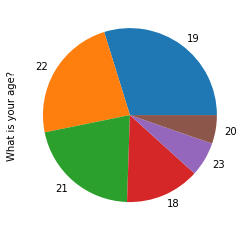

In [ ]:

age = df["What is your age?"]
gender = df["What gender do you identify as?"]
school = df["What school are you from"]
commuteTime = df["How much time does it usually take for you to go to campus? (min)"]
attendance = df["How many times did you go to campus to attend class this week?"] # classes they attended

# pie chart for age
df["What is your age?"].value_counts().plot.pie()

This provides us with some insight about the ages of all the people that are completing this. Everyone in this data set is of age 18-23, with the 19, 21, and 22 year olds making up more than 2/3 of the pie. This is what we want, as most college attendees are within the ages of 18-25. Additionally, they have the ability to drive (old enough to get their license) and most likely have a method of transportation which is what we want to analyze.

We can also now look at the schools of all the people that filled out the survey. 

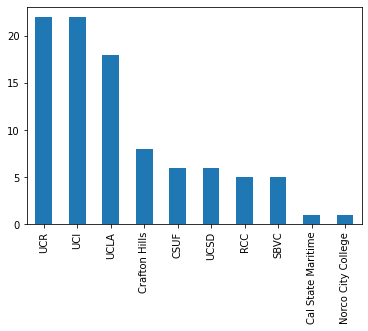

In [ ]:
# code for pie chart for schools
vals = df['What school are you from'].value_counts()
#vals = vals.drop(labels=['UCLA ']);
vals.plot.bar()

The majority of our respondents were from UCLA, UCR, and UCI, making almost 2/3 of the data. Each of these 3 colleges were more or less equal, with allows us to view trends that are not just at UCR. Although the majority were from UCs, some people were from Community Colleges and Cal States.

This provides an adequate sample size that also allows us to view commuter trends across different schools, not just at UCR (which was the reason for this survey being outside of class). Moreover, many factors can correlate on the desire to attend class, so this method provides more accurate data based off a larger geographic region across Southern California.  

Now, we wanted to look at the relationships between gender and age vs the amount of classes attended in a week. For this we decided to show stacked bar charts for both relationships.

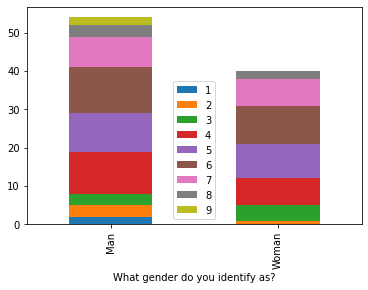

In [ ]:
# code for stacked bar chart, should be between gender and how many times they attended a class

stacked = pd.crosstab(gender, attendance)
stacked.plot.bar(stacked=True).legend(loc='best')

In the bar chart above, each color signifies the amount of classes a student chose to attend on campus. From the chart above, we can tell that both men and women mostly attended 4-6 classes. Both genders attended class at a similiar rate. However, this data is circumstantial and doesn't really provide us with much information. This doesn't show any patterns or trends, which allows us to look at commuter times and parking times independent of gender.


However, just because gender didn't show a relationship with attending classes in a week doesn't mean that differing ages won't.

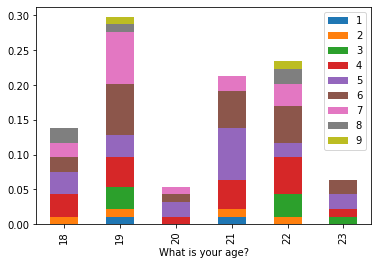

In [ ]:
stacked2 = pd.crosstab(age, attendance, normalize = True)
#stacked2
stacked2.plot.bar(stacked=True).legend(loc='best')

Once again, this doesn't really show much. Most people said they attended 4-6 classes in a week, irrespective of age. There don't seem to be any noticable differences across age, which allows us to disregard age as a potential factor in skewing our data. 

### Questions 4 and 5

**Hypothesis 1**

The main question that we wanted to answer was whether the time it takes to go to campus would affect student's willingness to go to their in-person classes.


Therefore, our main hypothesis was that **students that have to commute for longer will be less likely to attend their in-person classes**

--------


Null: The time it takes to commute does not affect student's willingness to go to their in-person classes.

Alternate: The time it takes to commute does affect student's willingness to go to their in-person classes

In order to test this first hypothesis, we decided to perform a correlation analysis between how long it takes to go to campus vs. how many times people attended within a given week. 

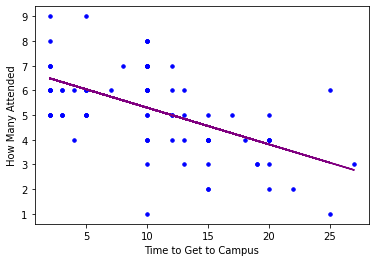

In [ ]:
commuteTime = df["How much time does it usually take for you to go to campus? (min)"]
attendance = df["How many times did you go to campus to attend class this week?"] # classes they attended

m, b = np. polyfit(commuteTime, attendance, 1)# m = slope, b = intercept
# this allows us to get the start and end spots for the plot



# scatter plot
plt.scatter(commuteTime, attendance, s = 12, c = "blue")
plt.xlabel("Time to Get to Campus")
plt.ylabel("How Many Attended")

# line for scatter plot
plt.plot(commuteTime, m*commuteTime+b, color = 'purple')

plt.show()

In [ ]:
# calculate the pearson's correlation between two variables
corr = attendance.corr(commuteTime, method = 'pearson')
print("Correlation Value: " , round(corr, 5)) # round to 5 spots

Correlation Value:  -0.54472


From the graph and values shown above, we can say that the time it takes to get to campus has a negative correlation to how many classes students attend on campus per week. The more time it takes to get to campus, the less classes students attend. To conclude, there is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from zero. 

Now, we can also perform a chi-squared analysis of these variables. However, the attendance needs to be grouped into sections in order to perform a proper analysis. So let's say that if they attended more than 4 classes that week, they were likely to attend a given class. If not, they are unlikely to attend.

In [ ]:
# create a new table with the data necessary
# counts = pd.crosstab(commuteTime, attendance)

times = df['How much time does it usually take for you to go to campus? (min)'].unique()
times.sort()

data = {'Time':times}
df2 = pd.DataFrame(data)
df2["Likely to Attend"] = 0
df2['Not Likely to Attend'] = 0
df2
for ind in df.index:
     if(df['How many times did you go to campus to attend class this week?'][ind] > 4):
          timeVal = df['How much time does it usually take for you to go to campus? (min)'][ind]
          timeVal
          index = df2.index[df2['Time'] == timeVal].tolist()
          index
          df2['Likely to Attend'][index[0]] =  df2['Likely to Attend'][index[0]] + 1 
     else:
          timeVal = df['How much time does it usually take for you to go to campus? (min)'][ind]
          timeVal
          index = df2.index[df2['Time'] == timeVal].tolist()
          index
          df2["Not Likely to Attend"][index[0]] = df2['Not Likely to Attend'][index[0]] + 1
df2

,Time,Likely to Attend,Not Likely to Attend
0,2,14,0
1,3,5,0
2,4,1,1
3,5,8,0
4,7,1,0
5,8,1,0
6,10,23,5
7,12,4,1
8,13,2,2
9,15,1,10


In [ ]:
# calculate the chi-square value of the dataset
# this should work
from scipy.stats import chi2_contingency
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(df2)
print("The calculated chi squared value:" , chi, "with a p-value:", p)


The calculated chi squared value: 191.72670777947934 with a p-value: 1.1176289325481308e-24


Since the p-value is less than alpha (significance level), we have no choice but to reject the null hypothesis. The chi-squared test confirms our correlation analysis.
Therefore, there is a strong correlation between weekly attendance and time it takes to get to campus. 

This makes sense, if someone isn't feeling well or has doubts of attending class in-person, they are less likely to want to spend all the time driving. If they live further, they might not want to drive as far for just one class or for a class that is short or not mandatory. However, if they live closer, they can find justification in coming to class.

------

**Hypothesis 2**

Another hypothesis that we wanted to test was that the harder it is to park, the less likely they are to attend their class

Null: The time it takes to find parking does not affect student's willingness to go to their in-person classes.

In order to test this hypothesis, we will be doing the same format as we did with the commute time.
We'll do a correlation analysis between how long it takes to park vs. how many times people attended within a given week.

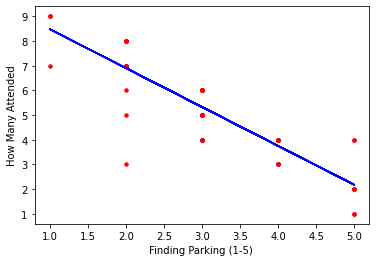

In [ ]:
parkTime = df["How hard was it to find parking for the days you DID choose to attend? (1-5 scale, 5 being impossible)"]

m, b = np. polyfit(parkTime, attendance, 1)# m = slope, b = intercept
# this allows us to get the start and end spots for the plot



# scatter plot
plt.scatter(parkTime, attendance, s = 12, c = "red")
plt.xlabel("Finding Parking (1-5) ")
plt.ylabel("How Many Attended")

# line for scatter plot
plt.plot(parkTime, m*parkTime+b, color = 'blue')

plt.show()

In [ ]:
# calculate the pearson's correlation between two variables
corr = attendance.corr(parkTime, method = 'pearson')
print("Correlation Value: " , round(corr, 5)) # round to 5 spots

Correlation Value:  -0.87557


The graph and data shows a strong negative correlation between finding parking and the amount of classes attended. The more time it takes to park, the less classes students attend. To conclude, there is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from zero. 

Let's do another chi-squared analysis of these two variables. Once again, the attendance needs to be grouped, with the same criteria as last time. Since the parking difficulty is already a scale, we don't need to group it.

In [ ]:
times = df['How hard was it to find parking for the days you DID choose to attend? (1-5 scale, 5 being impossible)'].unique()
times.sort()

data = {'Parking Difficulty (1-5)':times}
df3 = pd.DataFrame(data)
df3["Likely to Attend"] = 0
df3['Not Likely to Attend'] = 0
df3
for ind in df.index:
     if(df['How many times did you go to campus to attend class this week?'][ind] > 4):
          timeVal = df['How hard was it to find parking for the days you DID choose to attend? (1-5 scale, 5 being impossible)'][ind]
          timeVal
          index = df3.index[df3['Parking Difficulty (1-5)'] == timeVal].tolist()
          index
          df3['Likely to Attend'][index[0]] =  df3['Likely to Attend'][index[0]] + 1 
     else:
          timeVal = df['How hard was it to find parking for the days you DID choose to attend? (1-5 scale, 5 being impossible)'][ind]
          timeVal
          index = df3.index[df3['Parking Difficulty (1-5)'] == timeVal].tolist()
          index
          df3["Not Likely to Attend"][index[0]] = df3['Not Likely to Attend'][index[0]] + 1
df3

,Parking Difficulty (1-5),Likely to Attend,Not Likely to Attend
0,1,3,0
1,2,21,1
2,3,39,5
3,4,0,17
4,5,0,8


In [ ]:
# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(df3)
print("The calculated chi squared value:" , chi, "with a p-value:", p)

The calculated chi squared value: 74.32113266509286 with a p-value: 6.744871119358904e-13


Once again, since the p-value is less than alpha (significance level), we have no choice but to reject the null hypothesis. The chi-squared test confirms our correlation analysis.
Therefore, there is a strong correlation between weekly attendance and parking difficulty. This makes sense, if someone cannot find parking, they cannot attend classes at all. However, it was surprising that parking time was more of a stronger correlation with attending classes than commute time. Since commute time is constant, one would expect that to be more of a factor when a person decides if going to class is "worth it."

**Hypothesis 3**

The third hypothesis we wanted to test was if in-class graded exercises affect student’s desire to attend class in person rather than online, especially for hybrid classes.

Null: In-class graded exercises does not affect student’s desire to attend class in person rather than online (for hybrid classes)

To start, we have a heatmap that we wanted to look at that compares the in-person graded percentage to the amount of times

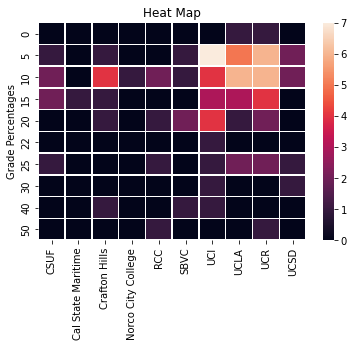

In [ ]:
import seaborn as sns 
grades = df['What percent of your grade is in-class exercises (0-100%)'].unique()
grades.sort()
hybrid = df['If a class is hybrid, how often do you attend in person (0-5 scale: 0 being never, 5 being almost all classes)?']
schools = df["What school are you from"].unique()
schools.sort()
data = {"Schools": schools}
df3 = pd.DataFrame(index=grades)
for str in schools:
    df3[str] = 0
df3
for ind in df.index:
    #if(df['How many times did you go to campus to attend class this week?'][ind] > 4):
        schoolVal = df['What school are you from'][ind]
        schoolVal
        gradeVal = df['What percent of your grade is in-class exercises (0-100%)'][ind]
        gradeVal
        hybridVal = df['If a class is hybrid, how often do you attend in person (0-5 scale: 0 being never, 5 being almost all classes)?'][ind]
        df3[schoolVal][gradeVal] = df3[schoolVal][gradeVal] + 1
    # else:
    #     schoolVal = df['What school are you from'][ind]
    #     schoolVal
    #     gradeVal = df['What percent of your grade is in-class exercises (0-100%)'][ind]
    #     df3[schoolVal][gradeVal] = df3[schoolVal][gradeVal] - 1

df3 


ax = sns.heatmap( df3 , linewidth = 0.5)
plt.title( "Heat Map" )
plt.ylabel("Grade Percentages")
plt.show()


So this shows us that grade percentage and hybrid attendance tends not to vary across different campuses. This is good, as this shows us that irrespective of campus (mainly), most students tend to feel the same ways about grade percentages and hybrid attendance.

Now, we can do correlation analysis, just like the last times.

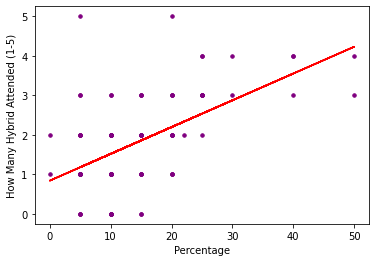

In [ ]:
percent = df["What percent of your grade is in-class exercises (0-100%)"]
hybrid = df["If a class is hybrid, how often do you attend in person (0-5 scale: 0 being never, 5 being almost all classes)?"]
m, b = np. polyfit(percent, hybrid, 1)# m = slope, b = intercept
# this allows us to get the start and end spots for the plot

# scatter plot
plt.scatter(percent, hybrid, s = 12, c = "purple")
plt.xlabel("Percentage")
plt.ylabel("How Many Hybrid Attended (1-5)")

# line for scatter plot
plt.plot(percent, m*percent+b, color = 'red')

plt.show()

In [ ]:
# calculate the pearson's correlation between two variables
corr = percent.corr(hybrid, method = 'pearson')
print("Correlation Value: " , round(corr, 5)) # round to 5 spots

Correlation Value:  0.56527


The graph and data shows a strong positive correlation between the percentage of in class excersises and the desire to attend in person for hybrid classes on a scale from 1-5. The more desire a student has to attend in person for hybrid classes, the more percentage they want for in class excersises. To conclude, there is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from zero.